# Modelling a region of the chromatin

### Load previous data

In [3]:
from pytadbit import load_chromosome
from pytadbit.parsers.hic_parser import load_hic_data_from_bam

In [5]:
crm = load_chromosome('results/fragment/chr3.tdb')

In [6]:
B, PSC = crm.experiments

In [7]:
B, PSC

(Experiment mouse_B (resolution: 100 kb, TADs: 96, Hi-C rows: 1601, normalized: None),
 Experiment mouse_PSC (resolution: 100 kb, TADs: 118, Hi-C rows: 1601, normalized: None))

Load raw data matrices, and normalized matrices

In [13]:
base_path = 'results/fragment/{0}_rep1/03_filtering/valid_reads12_{0}_rep1.bam'
bias_path = 'results/fragment/{0}_rep1/04_normalizing/biases_{0}_both_{1}kb.biases'
reso = 100000
chrname = 'chr3'
cel1 = 'mouse_B'
cel2 = 'mouse_PSC'

In [14]:
hic_data1 = load_hic_data_from_bam(base_path.format(cel1),
                                   resolution=reso,
                                   region='chr3',
                                   biases=bias_path.format(cel1, reso / 1000),
                                   ncpus=8)
#hic_data2 = load_hic_data_from_bam(base_path.format(cel2),
#                                   resolution=reso,
#                                   region='chr3',
#                                   biases=bias_path.format(cel2, reso / 1000),
#                                   ncpus=8)

IOError: [Errno 2] No such file or directory: 'results/fragment/mouse_B_rep1/04_normalizing/biases_mouse_B_both_100kb.biases'

In [7]:
B.load_hic_data([hic_data1.get_matrix(focus='chr3')])
B.load_norm_data([hic_data1.get_matrix(focus='chr3', normalized=True)])

PSC.load_hic_data([hic_data2.get_matrix(focus='chr3')])
PSC.load_norm_data([hic_data2.get_matrix(focus='chr3', normalized=True)])

### Modeling

We use the best parameters obtained from the optimization process to produce an ensemble of models.

From the models produced (n_models) we will tell TADbit to conserve a number of them (n_keep) that best satisfy the imposed restraints.

In [8]:
optimal_params = {'dcutoff': 2.0,
                 'kbending': 0.0,
                 'kforce': 5,
                 'lowfreq': -0.1,
                 'maxdist': 2250.0,
                 'reference': 'Stadhouders R, Vidal E, Serra F, Di Stefano B et al. 2018',
                 'scale': 0.01,
                 'upfreq': 0.1}

In [9]:
models_B = B.model_region(start=300, end=360, n_models=400, n_keep=100, n_cpus=8,
                            config=optimal_params)

In [10]:
models_PSC = PSC.model_region(start=300, end=360, n_models=400, n_keep=100, n_cpus=8,
                              config=optimal_params)

The ensemble of models have inherited the description from the Chromosome object

In [11]:
print models_B.description

{'restriction enzyme': None, 'start': 29900000, 'end': 36000000, 'assembly': None, 'resolution': 100000, 'identifier': None, 'experiment type': 'Hi-C', 'species': None, 'chromosome': 'chr3', 'cell type': None}


We still can access to the experiment object from the 3D models:

In [12]:
print models_B.experiment
print models_PSC.experiment

Experiment mouse_B:
   resolution        : 100 kb
   TADs              : 96
   Hi-C rows         : 1601
   normalized        : visibility
   identifier        : UNKNOWN
   cell type         : UNKNOWN
   restriction enzyme: UNKNOWN

Experiment mouse_PSC:
   resolution        : 100 kb
   TADs              : 118
   Hi-C rows         : 1601
   normalized        : visibility
   identifier        : UNKNOWN
   cell type         : UNKNOWN
   restriction enzyme: UNKNOWN



We can have a look at the data that was used to define restraints:

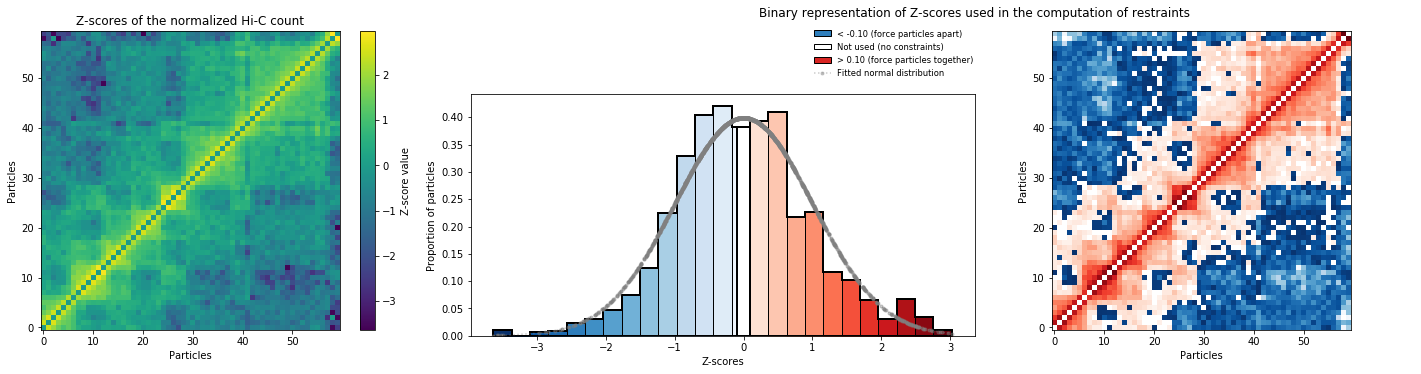

In [21]:
models_B.zscore_plot()

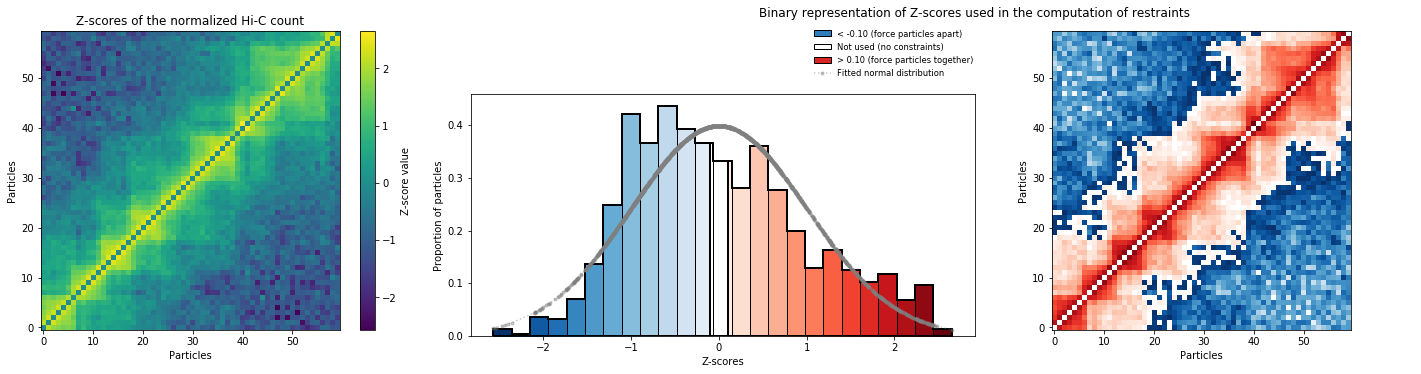

In [22]:
models_PSC.zscore_plot()

and also visualize how the IMP objective function (OF) of the stored model improves during the MOnte Carlo optimization:

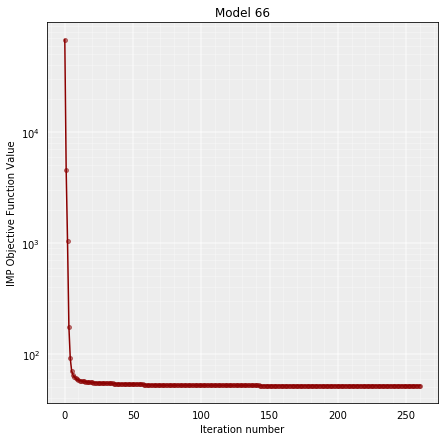

In [20]:
model.objective_function(log=True, smooth=False)

### Structural Models

The definition of the "best models" can be changed at any time. Only the best models will be used in the analysis.

Select top 10 models

In [13]:
models_B.define_best_models(10)
print "Lowest 10 IMP OF models:"
print models_B

Lowest 10 IMP OF models:
StructuralModels with 10 models of 61 particles
   (objective function range: 51 - 53)
   (corresponding to the best models out of 100 models).
  IMP modeling used this parameters:
   - maxdist     : 2.25
   - scale       : 0.01
   - dcutoff     : 2.0
   - reference   : Stadhouders R, Vidal E, Serra F, Di Stefano B et al. 2018
   - kforce      : 5
   - lowfreq     : -0.1
   - upfreq      : 0.1
   - lowrdist    : 1.0
   - container   : {'shape': None, 'radius': None, 'cforce': None, 'height': None}
   - resolution  : 100000
   - kbending    : 0.0
  Models where clustered into 0 clusters


 Select top 100 models

In [14]:
models_B.define_best_models(100)
print "Lowest 100 IMP OF models:"
print models_B

Lowest 100 IMP OF models:
StructuralModels with 100 models of 61 particles
   (objective function range: 51 - 55)
   (corresponding to the best models out of 100 models).
  IMP modeling used this parameters:
   - maxdist     : 2.25
   - scale       : 0.01
   - dcutoff     : 2.0
   - reference   : Stadhouders R, Vidal E, Serra F, Di Stefano B et al. 2018
   - kforce      : 5
   - lowfreq     : -0.1
   - upfreq      : 0.1
   - lowrdist    : 1.0
   - container   : {'shape': None, 'radius': None, 'cforce': None, 'height': None}
   - resolution  : 100000
   - kbending    : 0.0
  Models where clustered into 0 clusters


The ensemble of models "models_B" and "models_PSC" contain the models generated by the Montecarlo simulation ordered by its Objective Function (OF). The first model in the list is the one than best satisfies the imposed restraints.

To get the data for the lowest IMP OF model in the set of models we retrieve model number 0

In [15]:
model = models_B[0]
print model

IMP model ranked 1 (61 particles) with: 
 - Final objective function value: 51.9272783348
 - random initial value: 66
 - first coordinates:
        X      Y      Z
   -11698  -4519 -26493
   -12505  -5036 -26610
   -13363  -4652 -26351



We can check the correlation of models_B with the original HiC matrix. 

In the plot "Real vs modelled data" we should see a positive correlation of the contacts in the models with the frequency of interaction of the pairs of beads in the HiC matrix. High interaction frequency between two loci in the matrix is reflected by the fact of having a high proportion of models where the beads representing those two loci are "in contact" (distance lower than the cutoff). 

/home/dcastillo/miniconda2/lib/python2.7/site-packages/pytadbit/modelling/structuralmodels.py:1869: RuntimeWarning: divide by zero encountered in log2
  ims = ax.imshow(log2(self._original_data), origin='lower',


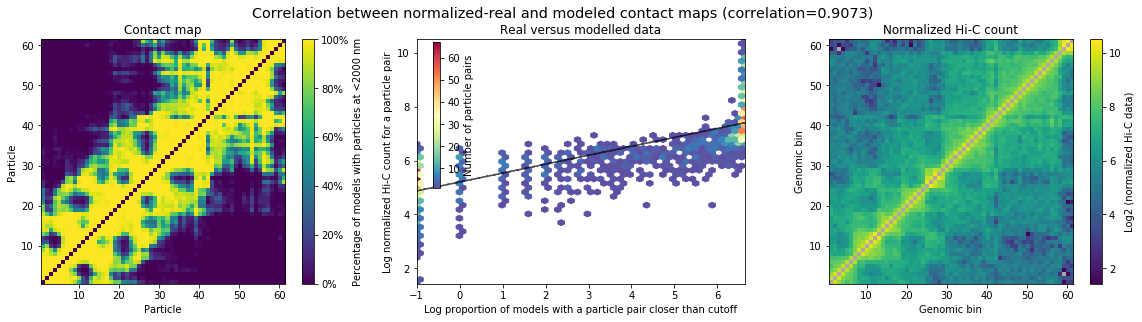

SpearmanrResult(correlation=0.9073157367165072, pvalue=0.0)

In [16]:
models_B.correlate_with_real_data(plot=True, cutoff=2000)

To plot all the models in the ensemble we use the view_models function. By default the centroid (the model closer to the median) is highlighted.

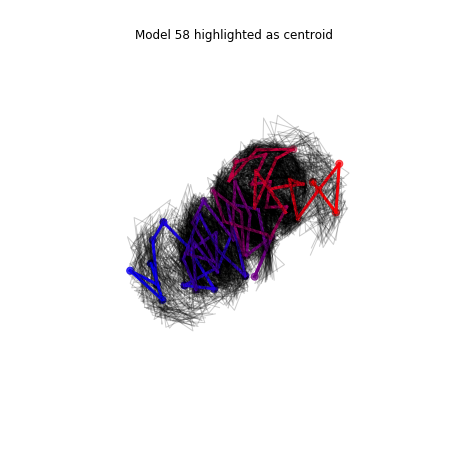

In [17]:
models_B.view_models(tool='plot')

We can also plot individual models.

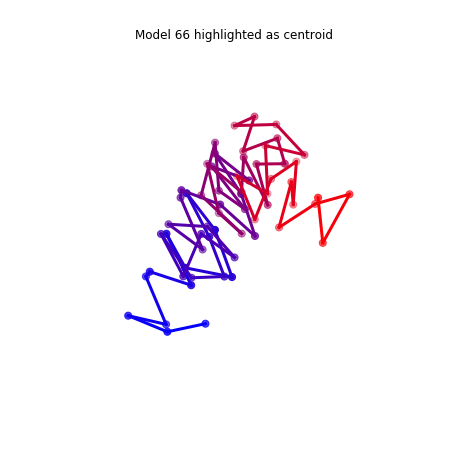

In [18]:
models_B.view_models(models=[0], tool='plot')

And use Chimera (https://www.cgl.ucsf.edu/chimera/) for the visualization of the 3D structure

In [92]:
models_PSC.view_models(models=[0], tool='chimera')

## Model analysis

### Align models

In the Montecarlo simulation each of the models is built starting from a random initial conformation. Therefore models are not aligned in a preferred orientation. We can use the function align_models to rotate and translate the coordinates of the models so they follow the same orientation as one of the models in the ensemble. By default the model used as reference is the first one. 

In [24]:
models_B.align_models(in_place=True)

With the function deconvolve we obtain a deconvolution analysis of a given froup of models.It first clusters models based on structural comparison (dRMSD). Differential contact map between each possible pair of clusters is shown in the resulting graph. This allows us to detect common sets of contacts in the ensemble.

### Deconvolve

Total number of clusters: 6
   Cluster #1 has 3 models [top model: 151]
   Cluster #2 has 3 models [top model: 66]
   Cluster #3 has 3 models [top model: 184]
   Cluster #4 has 2 models [top model: 208]
   Cluster #5 has 2 models [top model: 388]
   Cluster #6 has 2 models [top model: 288]



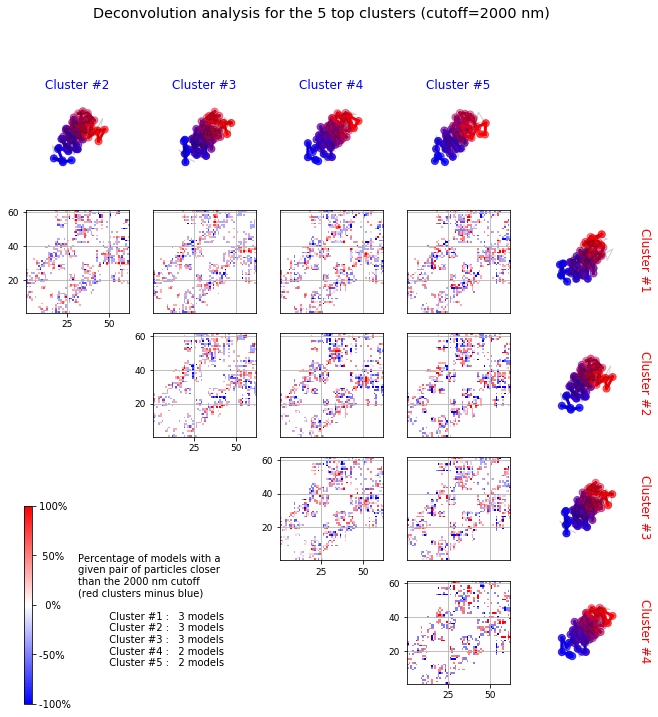

In [25]:
models_B.deconvolve(fact=0.35, dcutoff=2000, represent_models='best', n_best_clusters=5)

### Clustering

The clustering of the models by Markov Cluster Algorith (MCL) or Ward can be based on different statistics measures (score, rmsd, drmsd or eqv). By default a score computed as a combination of rmsd, drmsd and eqv is used.

In [38]:
# Cluster models based on structural similarity
models_B.cluster_models(fact=0.95, dcutoff=1000)
print models_B.clusters

Number of singletons excluded from clustering: 0 (total singletons: 0)
Total number of clusters: 4
   Cluster #1 has 44 models [top model: 388]
   Cluster #2 has 34 models [top model: 66]
   Cluster #3 has 14 models [top model: 303]
   Cluster #4 has 8 models [top model: 17]

Total number of clusters: 4
   Cluster #1 has 44 models [top model: 388]
   Cluster #2 has 34 models [top model: 66]
   Cluster #3 has 14 models [top model: 303]
   Cluster #4 has 8 models [top model: 17]



The analysis dendogram allows us to view the different clusters population and their OF values.

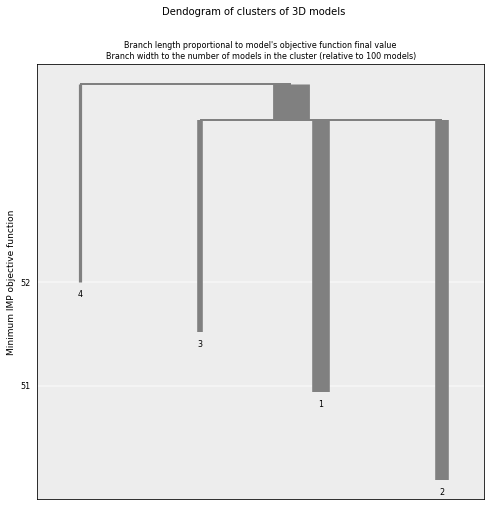

In [90]:
# Plot the resulting clusers
cl = models_B.cluster_analysis_dendrogram()

In [31]:
# Cluster models based on structural similarity
models_PSC.cluster_models(fact=0.95, dcutoff=1000)
print models_PSC.clusters

Number of singletons excluded from clustering: 47 (total singletons: 47)
Total number of clusters: 14
   Cluster #1 has 13 models [top model: 50]
   Cluster #2 has 4 models [top model: 71]
   Cluster #3 has 4 models [top model: 302]
   Cluster #4 has 4 models [top model: 177]
   Cluster #5 has 4 models [top model: 218]
   Cluster #6 has 4 models [top model: 155]
   Cluster #7 has 3 models [top model: 352]
   Cluster #8 has 3 models [top model: 93]
   Cluster #9 has 3 models [top model: 299]
   Cluster #10 has 3 models [top model: 82]
   Cluster #11 has 2 models [top model: 215]
   Cluster #12 has 2 models [top model: 51]
   Cluster #13 has 2 models [top model: 220]
   Cluster #14 has 2 models [top model: 27]

Total number of clusters: 14
   Cluster #1 has 13 models [top model: 50]
   Cluster #2 has 4 models [top model: 71]
   Cluster #3 has 4 models [top model: 302]
   Cluster #4 has 4 models [top model: 177]
   Cluster #5 has 4 models [top model: 218]
   Cluster #6 has 4 models [top m

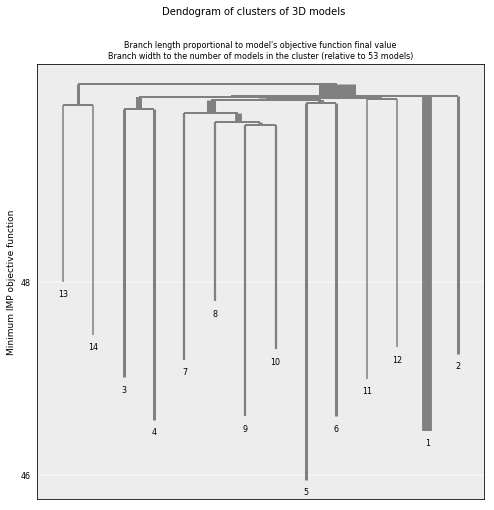

In [89]:
# Plot the resulting clusers
cl = models_PSC.cluster_analysis_dendrogram()

### Consistency

Model consistency gives a measure of the variability of the particles accross a set of models. Particles in the same position accross different models are considered consistent if their distance is less than the given cutoff.

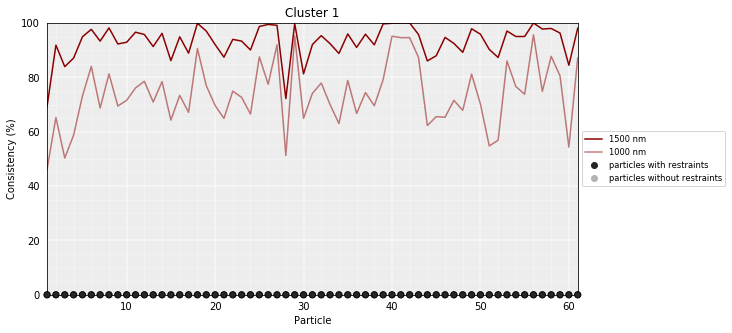

In [40]:
# Calculate the consistency plot for all models in the first cluster (cluster 0)
models_B.model_consistency(cluster=1, cutoffs=(1000,1500))

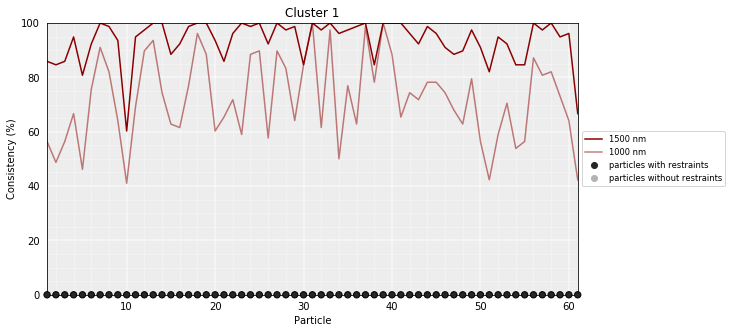

In [41]:
# Calculate the consistency plot for all models in the first cluster (cluster 0)
models_PSC.model_consistency(cluster=1, cutoffs=(1000,1500))

### DNA density plots

<p>
  <img style="float: left; margin: 0px 15px 15px 0px;" src="images/density.png" width="150"/>
From the 3D models, the DNA density (or local compactness) can be calculated as the ratio of the bin size (in base pairs) and the distances between consequtive particles in the models. The higher the density the more compact DNA for the region. As this measure varies dramatically from particle to particle, one can calculate it using running averages.
</p>
<p>
In the modelling we have used a scale of 0.01 nm/bp; that means that if we expect 100 bp/nm of chromatin in each bead and between two consecutives beads.
<br style="clear: both;" />
</p>


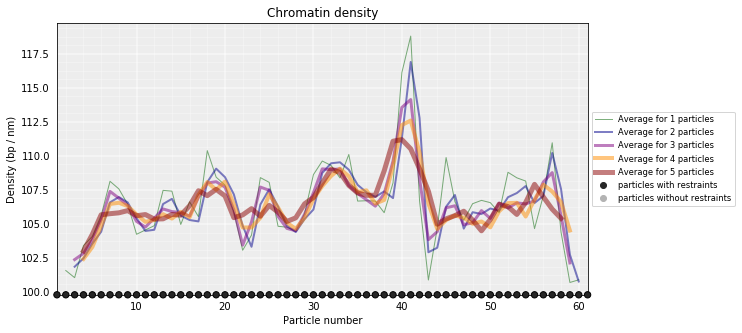

In [46]:
# Calculate a DNA density plot
models_B.density_plot(cluster=1)

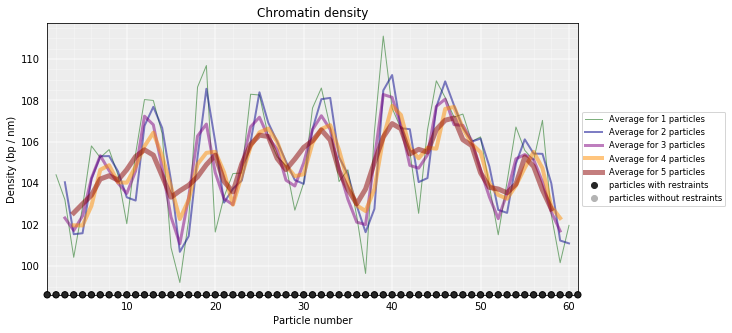

In [47]:
# Calculate a DNA density plot
models_PSC.density_plot()

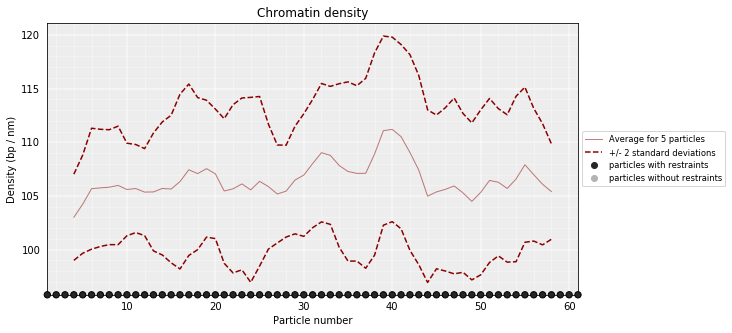

In [48]:
# Get a similar plot for only the top cluster and show the standar deviation for a specific(s) running window (steps)
models_B.density_plot(cluster=1,error=True, steps=(5))

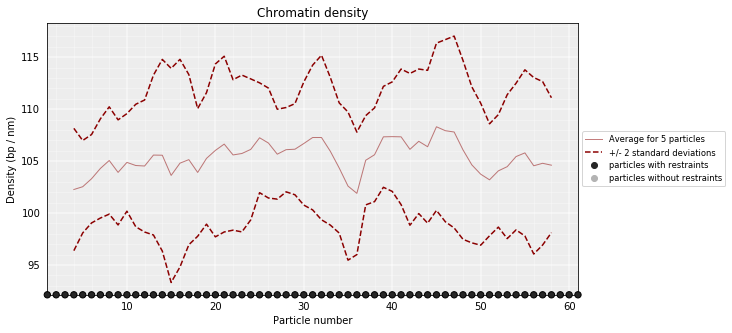

In [49]:
# Get a similar plot for only the top cluster and show the standar deviation for a specific(s) running window (steps)
models_PSC.density_plot(cluster=1,error=True, steps=(5))

### Walking Angle

<p>
  <img style="float: left; margin: 0px 15px 15px 0px;" src="images/angle.png" width="150"/>
Walking_angle plots the angle between triplets of contiguous particles. The higher are these values the straighter are the models.
</p>

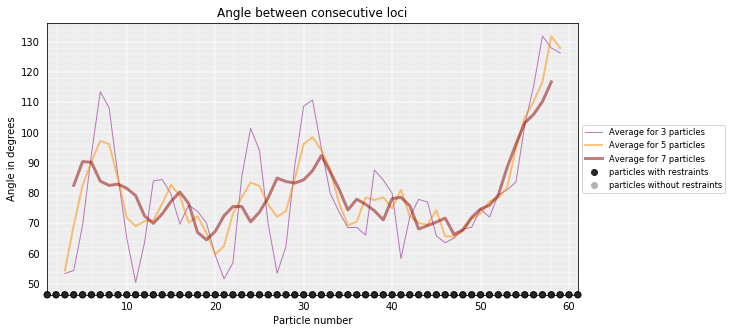

In [50]:
models_B.walking_angle(steps=(3, 5, 7), signed=False)

### Particles interactions

<p>
  <img style="float: left; margin: 0px 15px 15px 0px;" src="images/interactions.png" width="150"/>
We can plot for each particle the number of interactions (particles closer than the given cutoff)
</p>

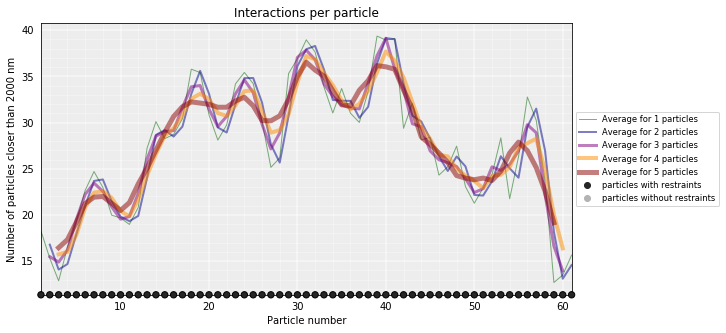

In [54]:
models_B.interactions(cutoff=2000)

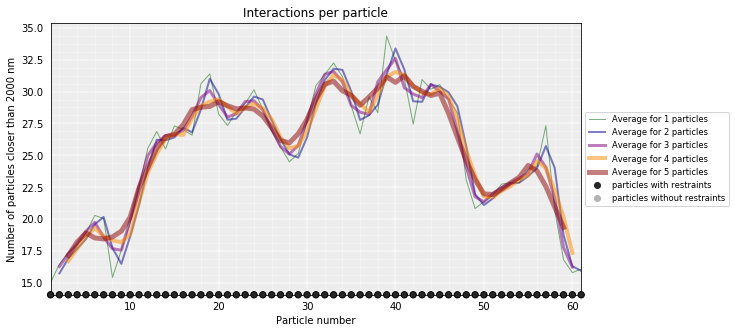

In [55]:
models_PSC.interactions(cutoff=2000)

### Accessibility

<p>
<img style="float: left; margin: 0px 15px 15px 0px;" src="images/accessibility.png" width="150"/>
The accessibility is calculated by considering a mesh surface around the model and checking if each point of this mesh could be replaced by an object (i.e. a protein) represented as a sphere of a given radius.
</p>
<p>
Outer part of the model can be excluded from the estimation of accessible surface because contacts from this outer part to particles outside the model are unknown. To exclude the outer contour a sphere with a higher radius (superradius) is first tested in the mesh before proceding to the accessibility calculation.
</p>

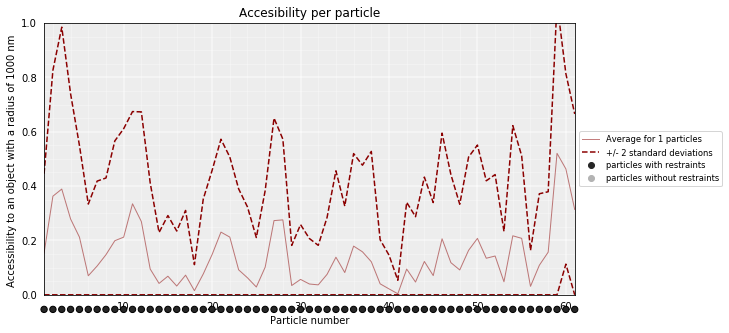

In [62]:
models_B.accessibility(cluster=1, radius=1000, nump=10, superradius=2000)

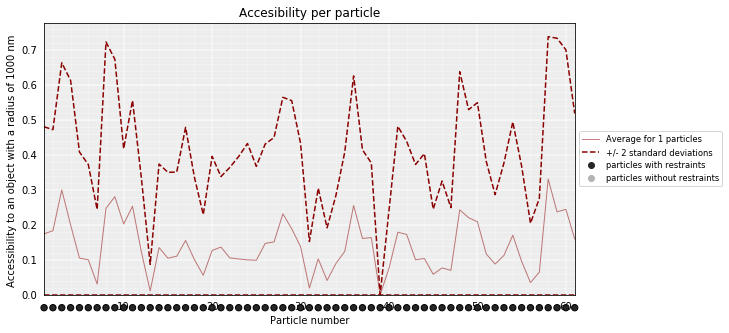

In [63]:
models_PSC.accessibility(cluster=1, radius=1000, nump=10, superradius=2000)

### Calculating distances between particles

To inspect the distance between two particles in the models we can use the median_3d_dist function which give us not only the median distance considering all the models but also an histogram of the different values accross them.

In [66]:
models_B.median_3d_dist(13, 20, plot=False)

1604.5285879828907

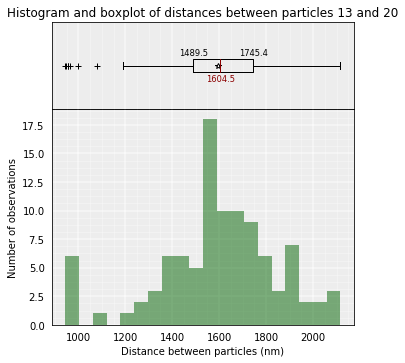

In [67]:
models_B.median_3d_dist(13, 20, plot=True)

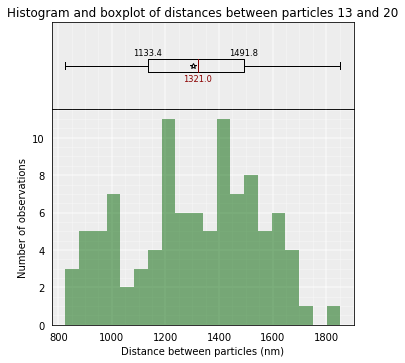

In [68]:
models_PSC.median_3d_dist(13, 20, plot=True)

The median distance can be calculated only in one of the clusters or in a set of models.

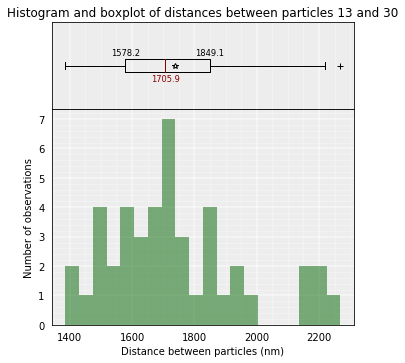

In [70]:
models_B.median_3d_dist(13, 30, cluster=1)

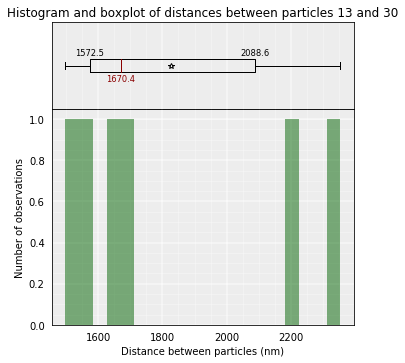

In [75]:
models_B.median_3d_dist(13, 30, models=[0,1,2,3,4,5])

The Structural Models object can be saved and retrieved at a later stage

In [76]:
# Save your entire analysis and models
models_B.save_models('B.models')

In [77]:
from pytadbit import load_structuralmodels

In [78]:
# Load the models
loaded_models = load_structuralmodels('B.models')
print loaded_models

StructuralModels with 100 models of 61 particles
   (objective function range: 51 - 55)
   (corresponding to the best models out of 100 models).
  IMP modeling used this parameters:
   - maxdist     : 2.25
   - scale       : 0.01
   - dcutoff     : 2.0
   - reference   : Stadhouders R, Vidal E, Serra F, Di Stefano B et al. 2018
   - kforce      : 5
   - lowfreq     : -0.1
   - upfreq      : 0.1
   - lowrdist    : 1.0
   - container   : {'shape': None, 'radius': None, 'cforce': None, 'height': None}
   - resolution  : 100000
   - kbending    : 0.0
  Models where clustered into 4 clusters


Other information can also be saved independently like the contacts map as a bed-like file, the models either as a xyz bed-like file or as cmm to visualize with Chimera.

We can also export the models and clusters to a JSON for a later inspection with TADkit (http://sgt.cnag.cat/3dg/tadkit/)

In [79]:
! mkdir -p results/models_B

In [82]:
models_B.experiment

Experiment mouse_B (resolution: 100 kb, TADs: 96, Hi-C rows: 1601, normalized: visibility)

In [83]:
models_B.contact_map(models=range(5,10), cutoff=2000, savedata="results/models_B/contact.txt")

In [87]:
# Write a CMM file for the top model
models_B.write_cmm(directory="results/models_B", model_num=0)
# Write CMM ofcentroid model
models_B.write_cmm(directory="results/models_B", model_num=models_B.centroid_model(cluster=1))
# Write a XYZ file for the top model
models_B.write_xyz(directory="results/models_B", model_num=0)
# Write a XYZ file for the top 10 models
models_B.write_xyz(directory="results/models_B", models=range(10))
# Write a XYZ file for the cluster 1 models
models_B.write_xyz(directory="results/models_B", cluster=1)
# Write TADkit JSON http://sgt.cnag.cat/3dg/tadkit/demo.h/
models_B.description['species'] = 'Mus Musculus'
models_B.write_json(filename="results/models_B/models_B.json", title="Mouse B")

In [85]:
! mkdir -p results/models_PSC

In [86]:
models_PSC.description['species'] = 'Mus Musculus'
models_PSC.write_json(filename="results/models_PSC/models_PSC.json", title="Mouse PSC")